In [ ]:
# Enable TensorFLow 2.0
%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:

import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications.vgg16 import decode_predictions
from google.colab import files

In [16]:
#load pretained model VGG16
vgg16_model = tf.keras.applications.VGG16(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=True
)

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
len(vgg16_model.layers)

23

**Use pretrained ConvNet to Classify one image**


In [17]:
def load_process_image(file_path):
    # Load Image (in PIL image format by default)
    image_original = load_img(file_path, target_size=(224, 224))

    # Convert to numpy array
    image_array = img_to_array(image_original)
    print("Image size after converting to numpy array:", image_array.shape)

    # Preprocess the image for the model (example: normalization)
    image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_array)

    return image_original, image_preprocessed


In [18]:
# Set image file path
cat_image_file_path = "images/content.cat.jpg"

In [19]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after converting to numpy array: (224, 224, 3)


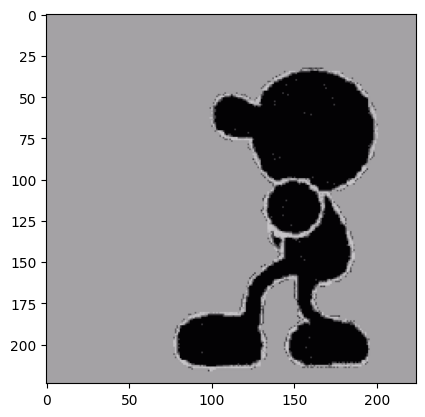

In [21]:
plt.imshow(cat_image_original)

# Get the predictions by the model

---



In [20]:
predictions = vgg16_model.predict(np.array([cat_image_preprocessed]))

1/1 [==============================] - 1s 1s/step


In [24]:
# There are 1000 predictions
predictions.shape

(1, 1000)

#Get the prediction class with the


In [29]:
# Get the prodictions class the highest probabilities
predicted_class = decode_predictions(predictions, top=1)

In [31]:
predicted_class

[[('n02782093', 'balloon', 0.272204)]]

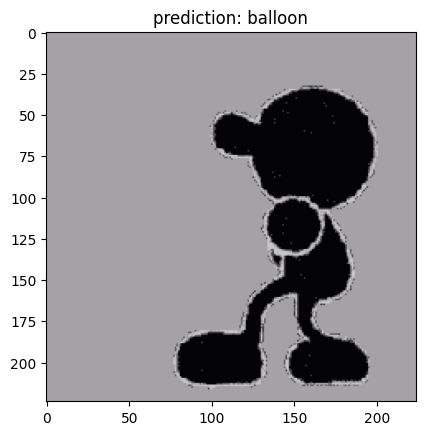

In [32]:
plt.imshow(cat_image_original)
predicted_class_name = predicted_class[0][0][1]
plt.title(predicted_class_name)
_ = plt.title("prediction: " + predicted_class_name)